# Import data into python environment

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
telecomdata=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
telecomdata.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
telecomdata.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [5]:
telecomdata.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
telecomdata.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,350621,Comcast,24-06-15,24-Jun-15,1:29:58 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [7]:
telecomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [8]:
#Add Date Month year with Time and save it into Full_date
telecomdata['Full_date']=telecomdata['Date_month_year']+' '+telecomdata['Time']

In [9]:
telecomdata.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Full_date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM


In [10]:
telecomdata['Date_month_year']=pd.to_datetime(telecomdata['Date_month_year'])
telecomdata['Full_date']=pd.to_datetime(telecomdata['Full_date'])
telecom_monthly = telecomdata.set_index(telecomdata["Full_date"])


In [11]:
telecomdata.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Full_date                      datetime64[ns]
dtype: object

<AxesSubplot:xlabel='Full_date', ylabel='No of complaints'>

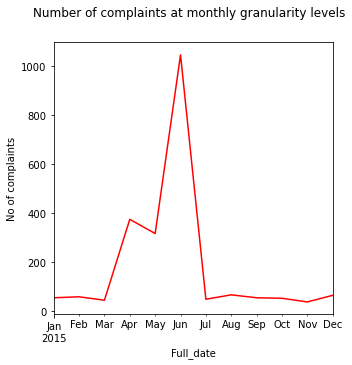

In [12]:
#Provide the trend chart for the number of complaints at monthly granularity levels.
plt.figure(figsize=(5,5))
plt.suptitle('Number of complaints at monthly granularity levels')
plt.ylabel('No of complaints')

telecom_monthly.groupby(pd.Grouper(freq='M')).size().plot(color='red')
#telecomdata.groupby(pd.Grouper(freq="M")).size().plot(color='red')



In [13]:
telecomdata.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Full_date                      datetime64[ns]
dtype: object

<AxesSubplot:xlabel='Day_of_month', ylabel='No of complaints'>

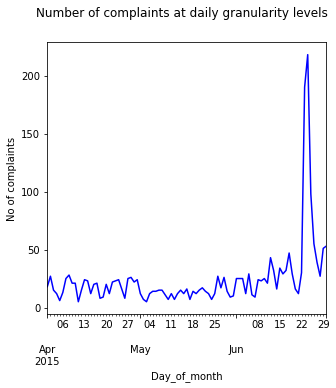

In [14]:
telecomdata['Day_of_month']=pd.to_datetime(telecomdata['Date'])
telecom_daily=telecomdata.set_index(telecomdata['Day_of_month'])
#plotting graph for daily complaints
plt.figure(figsize=(5,5))
plt.suptitle('Number of complaints at daily granularity levels')
plt.ylabel('No of complaints')
telecom_daily.groupby(pd.Grouper(freq='D')).size().plot(color='blue')

# Provide a table with the frequency of complaint types.

In [15]:
# checking all complaint types and check for duplicate, case sensentive,and incomplete data
telecom_complaint_types=telecomdata['Customer Complaint'].value_counts()

In [16]:
telecom_complaint_types

Comcast                                                           83
Comcast Internet                                                  18
Comcast Data Cap                                                  17
comcast                                                           13
Comcast Billing                                                   11
                                                                  ..
Extremely slow internet speeds; Horrible support                   1
comcast email acess                                                1
Comcast refuses to lower my bill to prevoius agreement             1
Internet Speed Cut in Half with no Notification                    1
unresponsive calls to customer service regarding wifi hotspots     1
Name: Customer Complaint, Length: 1841, dtype: int64

In [17]:
#converting all data into uper case or sentence case so duplicate value will shorted
telecom_complaint_types=telecomdata['Customer Complaint'].str.upper().value_counts()

In [18]:
telecom_complaint_types

COMCAST                                             102
COMCAST DATA CAP                                     30
COMCAST INTERNET                                     29
COMCAST DATA CAPS                                    21
COMCAST BILLING                                      18
                                                   ... 
FRAUDULENT ACCOUNT                                    1
OVERCHARGES                                           1
UNFAIR BILLING PRACTICES REGARDING COMCAST            1
COMCAST CHARGING RIDICULOUS PRICES                    1
COMCAST BILLING AFTER DISCONTINUATION OF SERVICE      1
Name: Customer Complaint, Length: 1740, dtype: int64

In [19]:
telecom_complaint_types.head(20)
#as dataset is huge so we have showed top 20 complaints and from the table we can see COMCAST,COMCAST DATA CAP and COMCAST INTERNET 
#are the top complaints

COMCAST                      102
COMCAST DATA CAP              30
COMCAST INTERNET              29
COMCAST DATA CAPS             21
COMCAST BILLING               18
COMCAST SERVICE               15
INTERNET SPEED                15
DATA CAPS                     13
UNFAIR BILLING PRACTICES      13
DATA CAP                      12
COMCAST COMPLAINT             11
COMCAST/XFINITY               11
COMCAST INTERNET SERVICE      10
BILLING                        9
BILLING ISSUES                 8
COMCAST BILLING COMPLAINT      5
SLOW INTERNET                  5
INTERNET                       5
COMCAST BILLING PRACTICES      5
COMPLAINT AGAINST COMCAST      5
Name: Customer Complaint, dtype: int64

# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [20]:
telecomdata["Status"].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [21]:
#Making a new column which will store open and pending as open and closed and solved as closed
telecomdata['Status_new']=['Open' if Status=='Open' or Status=='Pending' else
                        'Closed' for Status in telecomdata['Status']]

In [22]:
telecomdata['Status_new'].unique()

array(['Closed', 'Open'], dtype=object)

# Provide state wise status of complaints in a stacked bar chart. 

In [23]:
pd.crosstab(telecomdata.State,telecomdata.Status_new)

Status_new,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<AxesSubplot:title={'center':'State wise status of complaints'}, ylabel='State'>

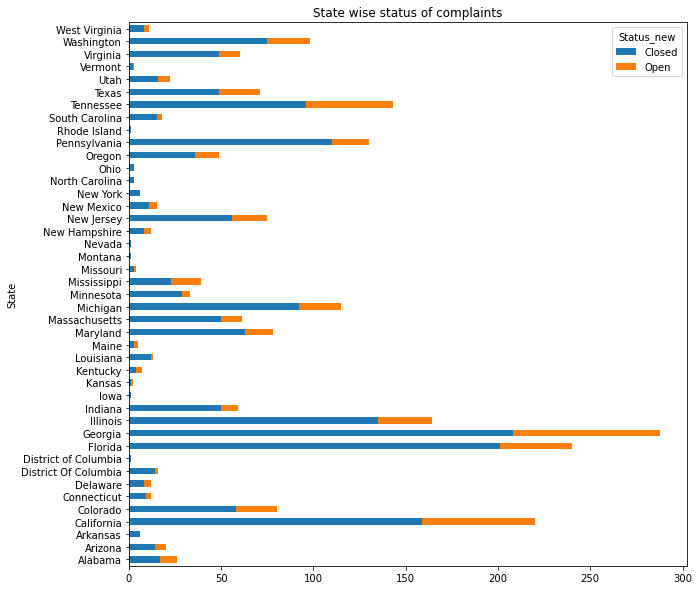

In [24]:
#plotting
pd.crosstab(telecomdata.State,telecomdata.Status_new).plot(kind='barh',figsize=(10,10),stacked=True,title='State wise status of complaints')

In [25]:
#from the plot we can see that
#Georgia has maximum complaints
#To find out the state which has highest percentage of unresolved problems
Open_complaint_status=telecomdata[telecomdata['Status_new']=='Open']

In [26]:
Unresolved_complaints=Open_complaint_status.State.value_counts()
Unresolved_complaints

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Washington              23
Michigan                23
Colorado                22
Texas                   22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Virginia                11
Massachusetts           11
Alabama                  9
Indiana                  9
Utah                     6
Arizona                  6
Delaware                 4
New Mexico               4
Minnesota                4
New Hampshire            4
West Virginia            3
South Carolina           3
Connecticut              3
Kentucky                 3
District Of Columbia     2
Maine                    2
Louisiana                1
Kansas                   1
Missouri                 1
Vermont                  1
Name: State, dtype: int64

<AxesSubplot:title={'center':'Unresolved complaints'}>

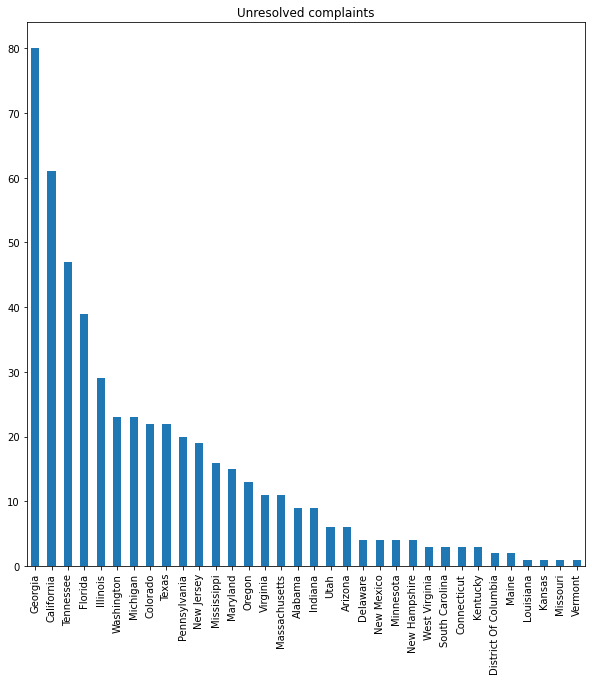

In [27]:
#plotting graph of unresolved complaints
Unresolved_complaints.plot(figsize=(10,10),title='Unresolved complaints',kind='bar')
#Georgia has the highest number of unresolved problems


# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [28]:
telecomdata.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'Full_date', 'Day_of_month',
       'Status_new'],
      dtype='object')

In [30]:
telecomdata['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [33]:
telecomdata['Status_new'].value_counts()

Closed    1707
Open       517
Name: Status_new, dtype: int64

([<matplotlib.patches.Wedge at 0x56272ab220>,
 [Text(-1.0429572663585824, 0.9339379746802423, ''),
  Text(0.8194664579195076, -0.7338083703153406, '')],
 [Text(-0.6704725283733745, 0.6003886980087272, '76.8%'),
  Text(0.44698170431973133, -0.40025911108109485, '23.2%')])

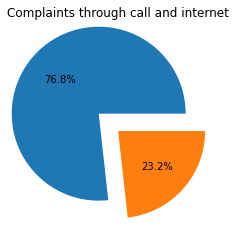

In [41]:
#There are only two types of complaints so there are total 1707 resolved complaints
#plotting a pie chart 
explode=[0.3,0]
plt.title('Complaints through call and internet')
plt.pie(telecomdata['Status_new'].value_counts(),autopct='%1.1f%%',explode=explode)